In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Crop_production_dataset.csv")
df.head()

,Record ID,Seed Size (mm),Seed Weight (g),Germination Rate (%),Seed Purity (%),Seed Viability (%),Seed Coat Thickness (mm),Soil pH,Organic Matter (%),Temperature (°C),...,Crop Yield (kg/ha),Field Size (ha),Harvest Date,Fertilizer Type_Urea,Pest Incidence_Low,Pest Incidence_Moderate,Disease Incidence_Low,Disease Incidence_Moderate,Crop Variety_Variety B,Crop Variety_Variety C
0,1,4.87,0.30,94.52,95.99,91.56,0.27,6.1,2.9,26.0,...,3183.0,3.0,2024-08-16,False,True,False,False,False,True,False
1,2,5.02,0.24,88.79,96.12,91.39,0.28,6.4,2.5,27.9,...,3065.0,3.9,2024-09-13,False,True,False,False,False,False,False
2,3,5.47,0.28,88.96,90.98,96.84,0.29,6.1,2.5,20.3,...,3185.0,4.0,2024-08-02,False,False,False,False,True,False,False
3,4,5.28,0.29,96.63,95.98,99.22,0.26,6.2,2.0,23.3,...,3141.0,3.7,2024-09-08,False,True,False,True,False,False,True
4,5,4.57,0.30,95.04,91.99,90.06,0.33,6.7,2.7,27.7,...,3064.0,3.0,2024-09-11,False,False,False,True,False,False,True


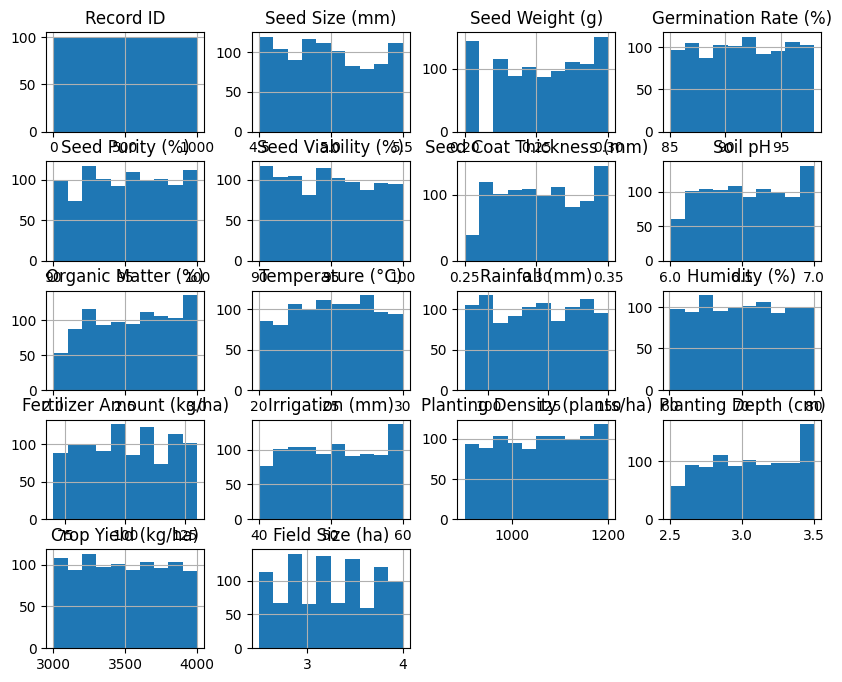

In [ ]:
# Visualize the data (you can customize this based on your dataset)
df.hist(figsize=(10, 8))
plt.show()

In [ ]:
df.shape

(1000, 26)

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Record ID                     1000 non-null   int64  
 1   Seed Size (mm)                1000 non-null   float64
 2   Seed Weight (g)               1000 non-null   float64
 3   Germination Rate (%)          1000 non-null   float64
 4   Seed Purity (%)               1000 non-null   float64
 5   Seed Viability (%)            1000 non-null   float64
 6   Seed Coat Thickness (mm)      1000 non-null   float64
 7   Soil pH                       1000 non-null   float64
 8   Organic Matter (%)            1000 non-null   float64
 9   Temperature (°C)              1000 non-null   float64
 10  Rainfall (mm)                 1000 non-null   float64
 11  Humidity (%)                  1000 non-null   float64
 12  Fertilizer Amount (kg/ha)     1000 non-null   float64
 13  Irri

In [ ]:
df.isnull().sum()


,0
Record ID,0
Seed Size (mm),0
Seed Weight (g),0
Germination Rate (%),0
Seed Purity (%),0
Seed Viability (%),0
Seed Coat Thickness (mm),0
Soil pH,0
Organic Matter (%),0
Temperature (°C),0


In [ ]:
info = [
    "Unique identifier for the record",
    "Size of the seed in millimeters",
    "Weight of the seed in grams",
    "Germination rate of the seed in percentage",
    "Purity of the seed in percentage",
    "Viability of the seed in percentage",
    "Thickness of the seed coat in millimeters",
    "pH value of the soil",
    "Organic matter content in percentage",
    "Temperature in degrees Celsius",
    "Humidity percentage",
    "Amount of fertilizer applied in kg per hectare",
    "Irrigation water applied in millimeters",
    "Rainfall during the growing season in millimeters",
    "Planting density in plants per hectare",
    "Planting depth in centimeters",
    "Field size in hectares",
    "Date of harvest",
    "Target variable: Crop yield in kilograms per hectare",
    "Type of fertilizer used",
    "Level of pest incidence",
    "Level of disease incidence",
    "Variety of the crop"
]

# Print column names with corresponding descriptions
for i in range(len(info)):
    print(df.columns[i]+":\t\t"+info[i])

Record ID:		Unique identifier for the record
Seed Size (mm):		Size of the seed in millimeters
Seed Weight (g):		Weight of the seed in grams
Germination Rate (%):		Germination rate of the seed in percentage
Seed Purity (%):		Purity of the seed in percentage
Seed Viability (%):		Viability of the seed in percentage
Seed Coat Thickness (mm):		Thickness of the seed coat in millimeters
Soil pH:		pH value of the soil
Organic Matter (%):		Organic matter content in percentage
Temperature (°C):		Temperature in degrees Celsius
Rainfall (mm):		Humidity percentage
Humidity (%):		Amount of fertilizer applied in kg per hectare
Fertilizer Amount (kg/ha):		Irrigation water applied in millimeters
Irrigation (mm):		Rainfall during the growing season in millimeters
Planting Density (plants/ha):		Planting density in plants per hectare
Planting Depth (cm):		Planting depth in centimeters
Crop Yield (kg/ha):		Field size in hectares
Field Size (ha):		Date of harvest
Harvest Date:		Target variable: Crop yield i

In [ ]:
# Find all duplicate rows except the first occurrence
duplicates = df[df.duplicated()]
print("Duplicate Rows:\n", duplicates)

Duplicate Rows:
 Empty DataFrame
Columns: [Record ID, Seed Size (mm), Seed Weight (g), Germination Rate (%), Seed Purity (%), Seed Viability (%), Seed Coat Thickness (mm), Soil pH, Organic Matter (%), Temperature (°C), Rainfall (mm), Humidity (%), Fertilizer Amount (kg/ha), Irrigation (mm), Planting Density (plants/ha), Planting Depth (cm), Crop Yield (kg/ha), Field Size (ha), Harvest Date, Fertilizer Type_Urea, Pest Incidence_Low, Pest Incidence_Moderate, Disease Incidence_Low, Disease Incidence_Moderate, Crop Variety_Variety B, Crop Variety_Variety C]
Index: []

[0 rows x 26 columns]


In [ ]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [ ]:
# prompt: check whetaher outliers present in the dataset or not

import numpy as np
# Select numerical columns for outlier detection
numerical_cols = df.select_dtypes(include=np.number).columns

# Loop through numerical columns and check for outliers using IQR method
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    if not outliers.empty:
        print(f"Outliers found in column '{col}':")
        print(outliers[[col]])
    else:
        print(f"No outliers found in column '{col}'")


No outliers found in column 'Record ID'
No outliers found in column 'Seed Size (mm)'
No outliers found in column 'Seed Weight (g)'
No outliers found in column 'Germination Rate (%)'
No outliers found in column 'Seed Purity (%)'
No outliers found in column 'Seed Viability (%)'
No outliers found in column 'Seed Coat Thickness (mm)'
No outliers found in column 'Soil pH'
No outliers found in column 'Organic Matter (%)'
No outliers found in column 'Temperature (°C)'
No outliers found in column 'Rainfall (mm)'
No outliers found in column 'Humidity (%)'
No outliers found in column 'Fertilizer Amount (kg/ha)'
No outliers found in column 'Irrigation (mm)'
No outliers found in column 'Planting Density (plants/ha)'
No outliers found in column 'Planting Depth (cm)'
No outliers found in column 'Crop Yield (kg/ha)'
No outliers found in column 'Field Size (ha)'


In [ ]:
# Split Dataset into Training and Test Sets:
# Differncite Features from Class labels and store features in X and labels in y
!pip install category_encoders
# Split Dataset into Training and Test Sets:
# Differncite Features from Class labels and store features in X and labels in y

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.2 MB/s eta 0:00:00


In [ ]:
X = df.iloc[:,:-1] # remove .values
y = df.iloc[:,-1].values

# Import OrdinalEncoder
from category_encoders import OrdinalEncoder

# Create OrdinalEncoder object
enc = OrdinalEncoder(cols=X.columns) # Use all columns in X

# Fit and transform on training data
X = enc.fit_transform(X)

In [ ]:
# Split the dataset in 80:20 ratio for training and testing
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 25)
(200, 25)
(800,)
(200,)


Accuracy: 0.62

Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.46      0.63       140
        True       0.44      1.00      0.61        60

    accuracy                           0.62       200
   macro avg       0.72      0.73      0.62       200
weighted avg       0.83      0.62      0.62       200



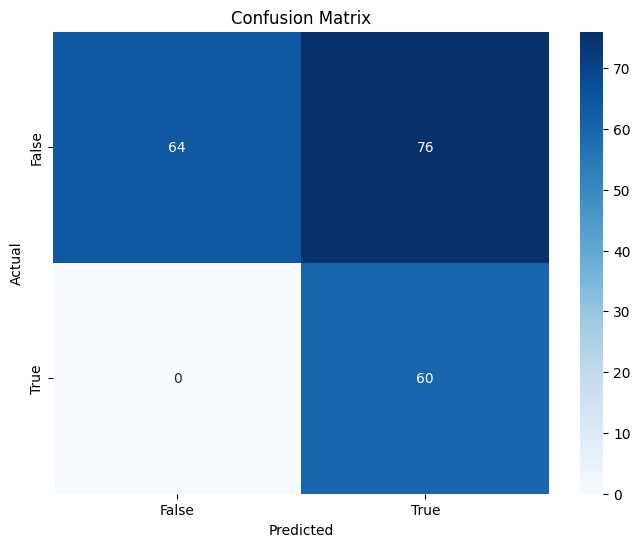

In [ ]:

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Create and train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Display confusion matrix with colors
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# For improving accuracy, you can consider:
# 1. Feature Engineering: Create new features from existing ones.
# 2. Data Preprocessing:  Handle missing values more effectively, scale features if needed.
# 3. Hyperparameter Tuning: Try different smoothing parameters for GaussianNB.
# 4. Different Model: Explore other classification algorithms.

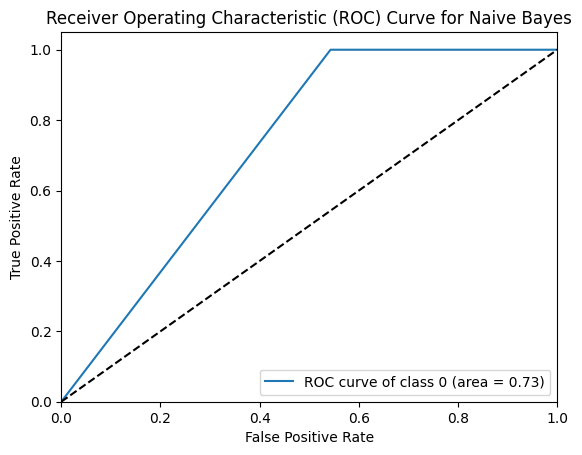

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

# Assuming y_test and y_pred are your true and predicted labels

# Convert multi-class labels to binary labels using LabelBinarizer
lb = LabelBinarizer()
lb.fit(y_test)
y_test_bin = lb.transform(y_test)
y_pred_bin = lb.transform(y_pred)

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.66

Classification Report:
               precision    recall  f1-score   support

       False       0.76      0.75      0.76       140
        True       0.44      0.45      0.44        60

    accuracy                           0.66       200
   macro avg       0.60      0.60      0.60       200
weighted avg       0.66      0.66      0.66       200



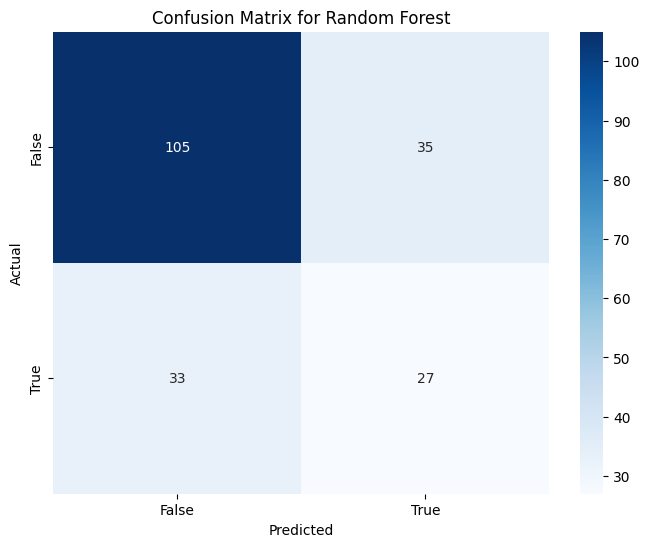

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Display confusion matrix with colors
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest")
plt.show()


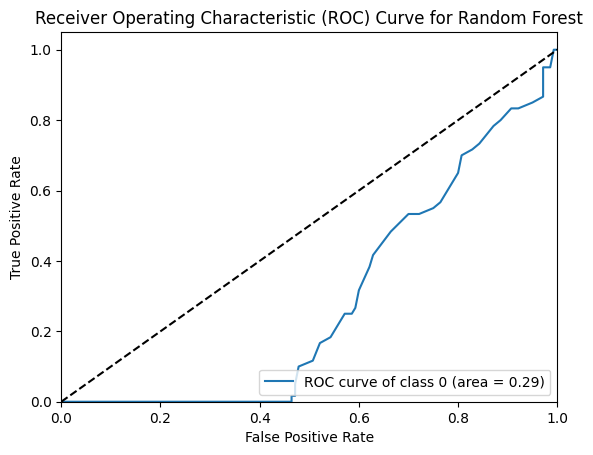

In [ ]:
# Convert multi-class labels to binary labels using LabelBinarizer
lb = LabelBinarizer()
lb.fit(y_test)
y_test_bin = lb.transform(y_test)
y_pred_prob = model.predict_proba(X_test)  # Get predicted probabilities for each class

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.645

Classification Report:
               precision    recall  f1-score   support

       False       0.77      0.70      0.73       140
        True       0.42      0.52      0.47        60

    accuracy                           0.65       200
   macro avg       0.60      0.61      0.60       200
weighted avg       0.67      0.65      0.65       200



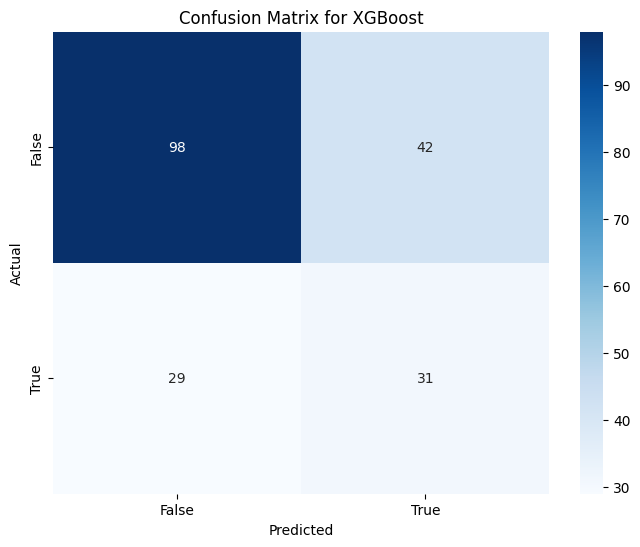

In [ ]:

!pip install xgboost

import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create and train the XGBoost model
model = xgb.XGBClassifier(
    objective='multi:softmax',  # For multi-class classification
    num_class=len(np.unique(y)),  # Specify the number of classes
    learning_rate=0.1,
    max_depth=6,
    n_estimators=100
)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Display confusion matrix with colors
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for XGBoost")
plt.show()

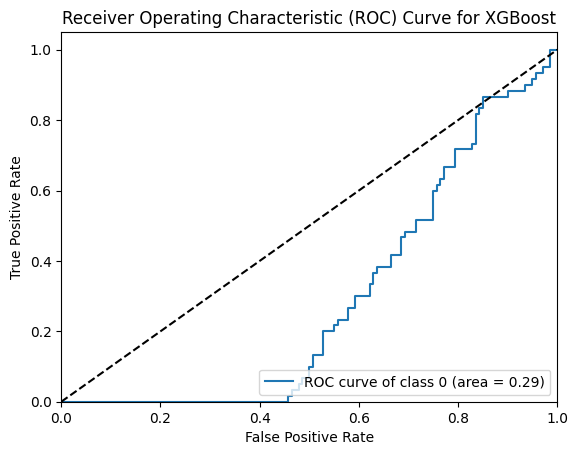

In [ ]:
# Convert multi-class labels to binary labels using LabelBinarizer
lb = LabelBinarizer()
lb.fit(y_test)
y_test_bin = lb.transform(y_test)
y_pred_prob = model.predict_proba(X_test)  # Get predicted probabilities for each class

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost')
plt.legend(loc="lower right")
plt.show()

Best Hyperparameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Accuracy: 0.635

Classification Report:
               precision    recall  f1-score   support

       False       0.77      0.68      0.72       140
        True       0.42      0.53      0.47        60

    accuracy                           0.64       200
   macro avg       0.59      0.61      0.59       200
weighted avg       0.67      0.64      0.65       200



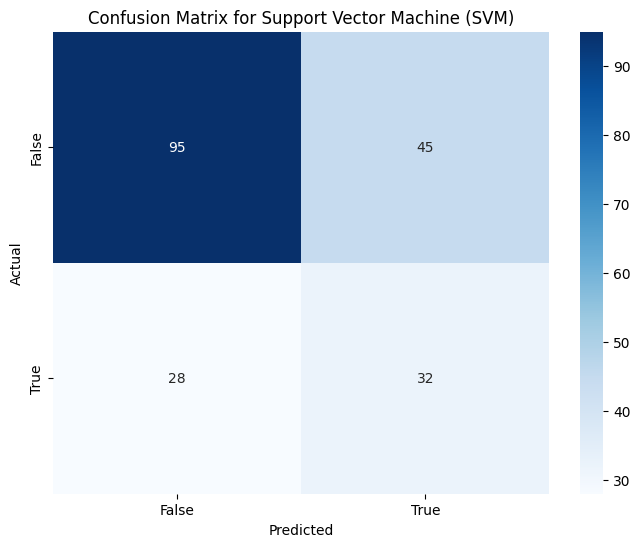

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVM model with hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
    'kernel': ['rbf', 'linear', 'poly']  # Kernel type
}

svm_model = SVC()
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its hyperparameters
best_svm_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions on the test set
y_pred = best_svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Display confusion matrix with colors
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Support Vector Machine (SVM)")
plt.show()

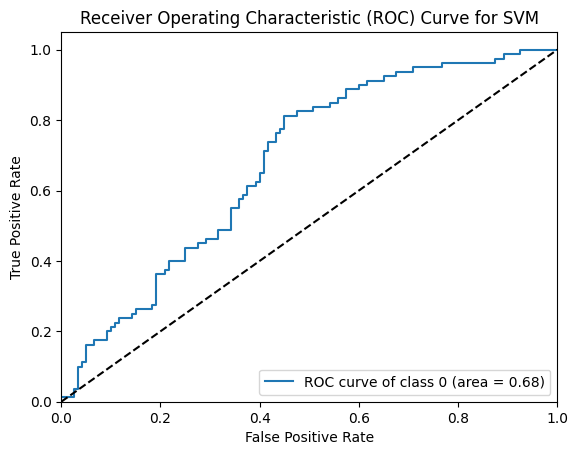

In [ ]:
# Assuming y_test and y_pred are your true and predicted labels
# Convert multi-class labels to binary labels using LabelBinarizer
lb = LabelBinarizer()
lb.fit(y_test)
y_test_bin = lb.transform(y_test)
y_pred_prob = best_svm_model.decision_function(X_test_scaled)  # Get decision function scores for SVM

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    # The change is on this line: removed the second index from y_pred_prob
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM')
plt.legend(loc="lower right")
plt.show()

XGBoost Accuracy: 0.645
XGBoost Precision: 0.6400646167557932
XGBoost Recall: 0.645
XGBoost F1-Score: 0.6421323146855061


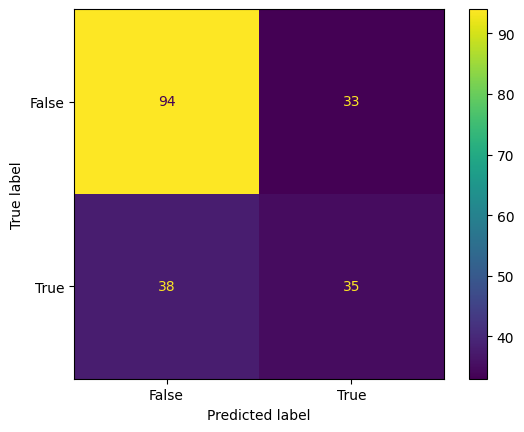

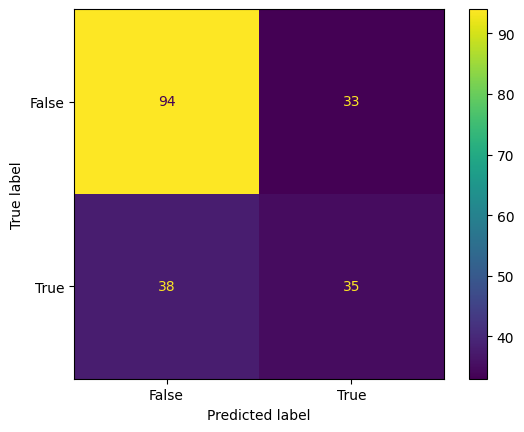

In [ ]:
# prompt: apply xg boost

import matplotlib.pyplot as plt
!pip install xgboost

from xgboost import XGBClassifier

# Create an XGBoost classifier
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy_xgb = metrics.accuracy_score(y_test, y_pred_xgb)
precision_xgb = metrics.precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = metrics.recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = metrics.f1_score(y_test, y_pred_xgb, average='weighted')

print("XGBoost Accuracy:", accuracy_xgb)
print("XGBoost Precision:", precision_xgb)
print("XGBoost Recall:", recall_xgb)
print("XGBoost F1-Score:", f1_xgb)

# You can also generate a confusion matrix for the XGBoost model
cm_display_xgb = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb)
cm_display_xgb.plot()
plt.show()


In [ ]:
# prompt: install cat boost

!pip install catboost


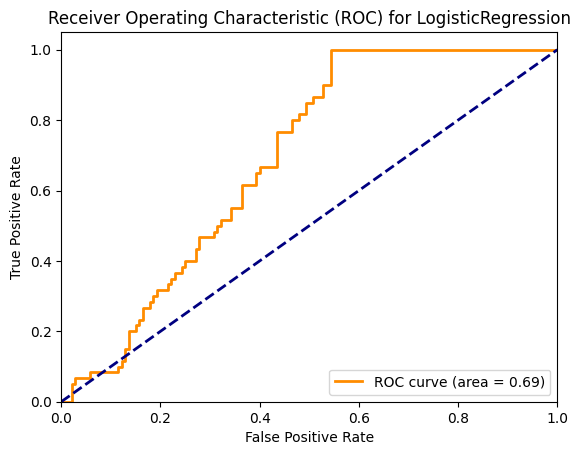

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming you have your dataset loaded and split into X_train, X_test, y_train, y_test

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model with increased max_iter and different solver if needed
model = LogisticRegression(max_iter=1000, solver='lbfgs')  # You can try 'liblinear', 'saga', etc.
model.fit(X_train_scaled, y_train)

# Get predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for LogisticRegression')
plt.legend(loc="lower right")
plt.show()
